## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.173961  0.579684 -1.372997 -0.708416  1.207709  1.448999
1  0.304329  0.653649  0.251798  0.788080  0.058825  1.081881
2 -0.404461 -0.564597 -0.089576 -1.500653 -1.737218 -2.276754
3 -0.018755  0.506185  1.036679  0.957972 -0.460207  1.107356
4  1.429163  0.535272 -0.037272  1.275257  1.427451  1.920115


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9610939	total: 57.9ms	remaining: 57.8s
1:	learn: 0.9529312	total: 58.4ms	remaining: 29.2s
2:	learn: 0.9447020	total: 58.9ms	remaining: 19.6s
3:	learn: 0.9357814	total: 59.5ms	remaining: 14.8s
4:	learn: 0.9277926	total: 60.2ms	remaining: 12s
5:	learn: 0.9205269	total: 60.7ms	remaining: 10.1s
6:	learn: 0.9119816	total: 61.3ms	remaining: 8.69s
7:	learn: 0.9027056	total: 61.8ms	remaining: 7.66s
8:	learn: 0.8933507	total: 62.5ms	remaining: 6.88s
9:	learn: 0.8865844	total: 63ms	remaining: 6.24s
10:	learn: 0.8784152	total: 63.5ms	remaining: 5.71s
11:	learn: 0.8693526	total: 64ms	remaining: 5.26s
12:	learn: 0.8616076	total: 64.4ms	remaining: 4.89s
13:	learn: 0.8534263	total: 64.9ms	remaining: 4.57s
14:	learn: 0.8455544	total: 65.3ms	remaining: 4.29s
15:	learn: 0.8377882	total: 65.7ms	remaining: 4.04s
16:	learn: 0.8312510	total: 66.2ms	remaining: 3.83s
17:	learn: 0.8248170	total: 66.6ms	remaining: 3.63s
18:	learn: 0.8190669	total: 67.1ms	remaining: 3.46

104:	learn: 0.4190589	total: 108ms	remaining: 923ms
105:	learn: 0.4162145	total: 109ms	remaining: 918ms
106:	learn: 0.4139282	total: 109ms	remaining: 912ms
107:	learn: 0.4106952	total: 110ms	remaining: 906ms
108:	learn: 0.4076838	total: 110ms	remaining: 900ms
109:	learn: 0.4051024	total: 110ms	remaining: 894ms
110:	learn: 0.4019781	total: 111ms	remaining: 888ms
111:	learn: 0.3994320	total: 111ms	remaining: 883ms
112:	learn: 0.3973836	total: 112ms	remaining: 878ms
113:	learn: 0.3947846	total: 112ms	remaining: 872ms
114:	learn: 0.3914733	total: 113ms	remaining: 867ms
115:	learn: 0.3890192	total: 113ms	remaining: 863ms
116:	learn: 0.3866865	total: 114ms	remaining: 858ms
117:	learn: 0.3836448	total: 114ms	remaining: 853ms
118:	learn: 0.3810590	total: 115ms	remaining: 849ms
119:	learn: 0.3791154	total: 115ms	remaining: 844ms
120:	learn: 0.3765373	total: 116ms	remaining: 839ms
121:	learn: 0.3736551	total: 116ms	remaining: 835ms
122:	learn: 0.3708942	total: 117ms	remaining: 831ms
123:	learn: 

267:	learn: 0.1467921	total: 187ms	remaining: 510ms
268:	learn: 0.1457026	total: 187ms	remaining: 509ms
269:	learn: 0.1446404	total: 188ms	remaining: 508ms
270:	learn: 0.1433265	total: 188ms	remaining: 507ms
271:	learn: 0.1419851	total: 189ms	remaining: 506ms
272:	learn: 0.1409739	total: 189ms	remaining: 504ms
273:	learn: 0.1403215	total: 190ms	remaining: 503ms
274:	learn: 0.1395868	total: 190ms	remaining: 502ms
275:	learn: 0.1387704	total: 191ms	remaining: 500ms
276:	learn: 0.1375152	total: 191ms	remaining: 499ms
277:	learn: 0.1366835	total: 192ms	remaining: 498ms
278:	learn: 0.1359901	total: 192ms	remaining: 496ms
279:	learn: 0.1352869	total: 193ms	remaining: 495ms
280:	learn: 0.1345488	total: 193ms	remaining: 494ms
281:	learn: 0.1337462	total: 193ms	remaining: 493ms
282:	learn: 0.1328108	total: 194ms	remaining: 491ms
283:	learn: 0.1318960	total: 194ms	remaining: 490ms
284:	learn: 0.1310346	total: 195ms	remaining: 489ms
285:	learn: 0.1298559	total: 195ms	remaining: 487ms
286:	learn: 

491:	learn: 0.0496471	total: 292ms	remaining: 302ms
492:	learn: 0.0494897	total: 293ms	remaining: 301ms
493:	learn: 0.0492674	total: 293ms	remaining: 300ms
494:	learn: 0.0491138	total: 294ms	remaining: 299ms
495:	learn: 0.0489746	total: 294ms	remaining: 299ms
496:	learn: 0.0486362	total: 295ms	remaining: 298ms
497:	learn: 0.0483486	total: 295ms	remaining: 297ms
498:	learn: 0.0481345	total: 295ms	remaining: 297ms
499:	learn: 0.0479862	total: 296ms	remaining: 296ms
500:	learn: 0.0478525	total: 296ms	remaining: 295ms
501:	learn: 0.0477211	total: 297ms	remaining: 294ms
502:	learn: 0.0473943	total: 297ms	remaining: 293ms
503:	learn: 0.0472512	total: 297ms	remaining: 293ms
504:	learn: 0.0469743	total: 298ms	remaining: 292ms
505:	learn: 0.0467702	total: 298ms	remaining: 291ms
506:	learn: 0.0466381	total: 299ms	remaining: 290ms
507:	learn: 0.0463215	total: 299ms	remaining: 290ms
508:	learn: 0.0460780	total: 300ms	remaining: 289ms
509:	learn: 0.0459887	total: 300ms	remaining: 288ms
510:	learn: 

657:	learn: 0.0265006	total: 370ms	remaining: 193ms
658:	learn: 0.0264273	total: 371ms	remaining: 192ms
659:	learn: 0.0263033	total: 371ms	remaining: 191ms
660:	learn: 0.0261814	total: 372ms	remaining: 191ms
661:	learn: 0.0261092	total: 372ms	remaining: 190ms
662:	learn: 0.0259890	total: 373ms	remaining: 190ms
663:	learn: 0.0258708	total: 373ms	remaining: 189ms
664:	learn: 0.0257451	total: 374ms	remaining: 188ms
665:	learn: 0.0256437	total: 374ms	remaining: 188ms
666:	learn: 0.0255447	total: 375ms	remaining: 187ms
667:	learn: 0.0254214	total: 375ms	remaining: 186ms
668:	learn: 0.0253019	total: 376ms	remaining: 186ms
669:	learn: 0.0252064	total: 376ms	remaining: 185ms
670:	learn: 0.0251145	total: 377ms	remaining: 185ms
671:	learn: 0.0249965	total: 377ms	remaining: 184ms
672:	learn: 0.0248818	total: 377ms	remaining: 183ms
673:	learn: 0.0247705	total: 378ms	remaining: 183ms
674:	learn: 0.0246577	total: 378ms	remaining: 182ms
675:	learn: 0.0245431	total: 379ms	remaining: 182ms
676:	learn: 

868:	learn: 0.0126784	total: 475ms	remaining: 71.7ms
869:	learn: 0.0126338	total: 476ms	remaining: 71.1ms
870:	learn: 0.0125905	total: 476ms	remaining: 70.6ms
871:	learn: 0.0125468	total: 477ms	remaining: 70ms
872:	learn: 0.0124925	total: 477ms	remaining: 69.4ms
873:	learn: 0.0124396	total: 478ms	remaining: 68.9ms
874:	learn: 0.0124170	total: 478ms	remaining: 68.3ms
875:	learn: 0.0123947	total: 479ms	remaining: 67.8ms
876:	learn: 0.0123727	total: 479ms	remaining: 67.2ms
877:	learn: 0.0123365	total: 480ms	remaining: 66.6ms
878:	learn: 0.0122609	total: 480ms	remaining: 66.1ms
879:	learn: 0.0122225	total: 480ms	remaining: 65.5ms
880:	learn: 0.0121487	total: 481ms	remaining: 65ms
881:	learn: 0.0121276	total: 481ms	remaining: 64.4ms
882:	learn: 0.0120904	total: 482ms	remaining: 63.9ms
883:	learn: 0.0120192	total: 482ms	remaining: 63.3ms
884:	learn: 0.0119879	total: 483ms	remaining: 62.7ms
885:	learn: 0.0119181	total: 483ms	remaining: 62.2ms
886:	learn: 0.0119031	total: 484ms	remaining: 61.6

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

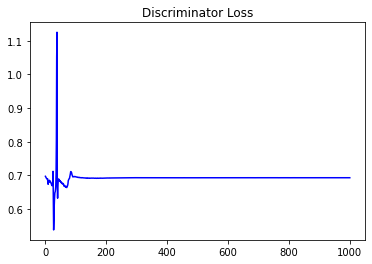

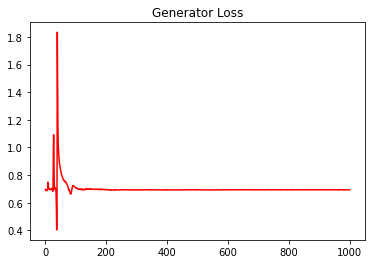

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.18774764078955847


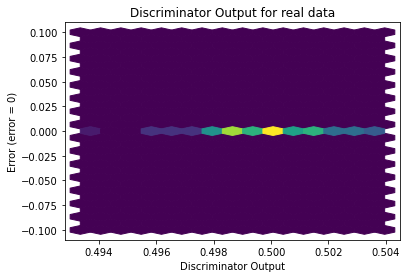

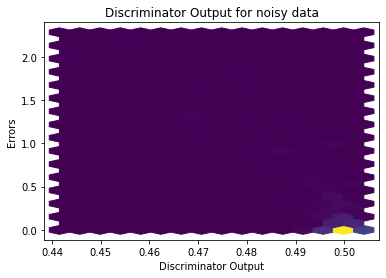

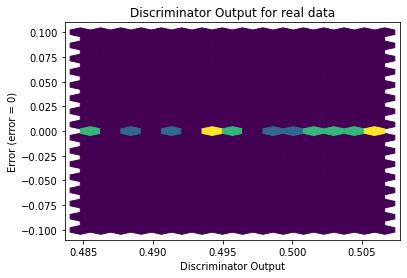

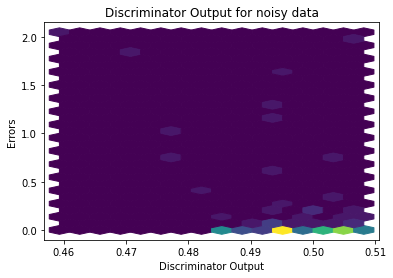

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


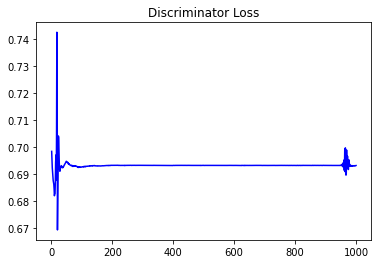

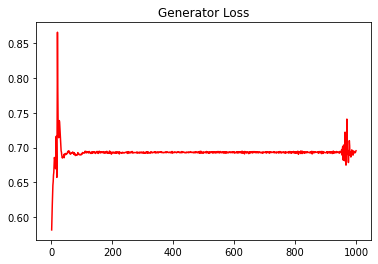

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.20198049571565474


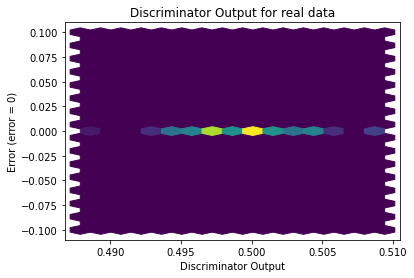

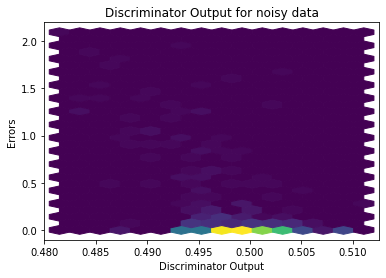

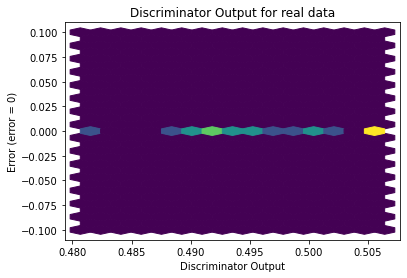

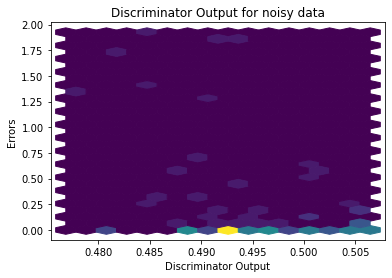

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6976]], requires_grad=True)
